In [1]:
#Bonus
import pandas as pd
#import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
#sql to pandas
from sqlalchemy import create_engine
#engine = create_engine('postgresql://localhost:5432/EmployeeSQL')
engine = create_engine('postgresql://postgres:<YOUR PASSWORD HERE>@localhost:5432/EmployeeSQL')
connection = engine.connect()

In [3]:
#Create a histogram to visualize the most common salary ranges for employees

In [4]:
#Create a bar chart of average salary by title

In [13]:
query_salaries = "SELECT * FROM salaries "
query_employees = "SELECT emp_no, emp_title_id FROM employees"
query_titles = "SELECT * FROM titles"

In [14]:
salaries_df = pd.read_sql_query(query_salaries, engine) 
employees_df = pd.read_sql_query(query_employees,engine)
titles_df = pd.read_sql_query(query_titles,engine)

In [15]:
salaries_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [16]:
employees_df.head()

,emp_no,emp_title_id
0,473302,s0001
1,475053,e0002
2,57444,e0002
3,421786,s0001
4,282238,e0003


In [17]:
titles_df.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [18]:
salaries_df.shape

(300024, 2)

In [19]:
employees_df.shape

(300024, 2)

In [20]:
titles_df.shape

(7, 2)

In [21]:
salaries_df.emp_no.nunique()

300024

In [22]:
employees_df.emp_no.nunique()

300024

In [23]:
titles_df.title_id.nunique()

7

In [24]:
salaries_df.describe()

,emp_no,salary
count,300024.000000,300024.000000
mean,253321.763392,52970.732451
std,161828.235540,14301.478491
min,10001.000000,40000.000000
25%,85006.750000,40000.000000
50%,249987.500000,48681.000000
75%,424993.250000,61758.000000
max,499999.000000,129492.000000


In [25]:
employees_salaries_merge = pd.merge(employees_df, salaries_df)

In [26]:
employees_salaries_merge.head()

,emp_no,emp_title_id,salary
0,473302,s0001,40000
1,475053,e0002,53422
2,57444,e0002,48973
3,421786,s0001,40000
4,282238,e0003,40000


In [27]:
employees_salaries_titles_merge = pd.merge(employees_salaries_merge, titles_df, left_on='emp_title_id', right_on='title_id')

In [28]:
print(employees_df.shape)
print(salaries_df.shape)
print(employees_salaries_merge.shape)
print(employees_salaries_titles_merge.shape)

(300024, 2)
(300024, 2)
(300024, 3)
(300024, 5)


In [29]:
employees_salaries_titles_merge.head()

,emp_no,emp_title_id,salary,title_id,title
0,473302,s0001,40000,s0001,Staff
1,421786,s0001,40000,s0001,Staff
2,273487,s0001,56087,s0001,Staff
3,246449,s0001,87084,s0001,Staff
4,48085,s0001,63016,s0001,Staff


Text(0, 0.5, 'employee_counts')

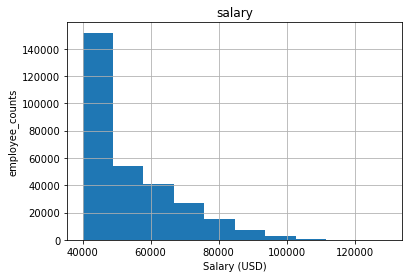

In [32]:
#Create a histogram to visualize the most common salary ranges for employees
import pylab as pl
employees_salaries_merge.hist(column = 'salary')

# Set the x-axis label
pl.xlabel("Salary (USD)")

# Set the y-axis label
pl.ylabel("employee_counts")

In [47]:
salary_by_title = employees_salaries_titles_merge. groupby(['title'])['salary'].mean().to_frame(name = 'salary_mean').reset_index()
salary_by_title

,title,salary_mean
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


Text(0, 0.5, 'salary_mean (USD)')

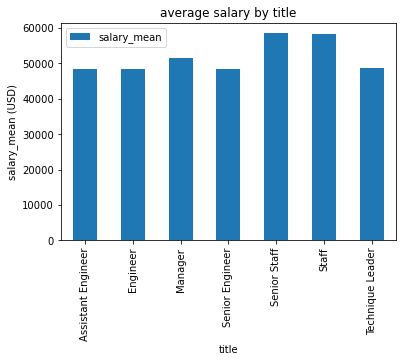

In [55]:
#Create a bar chart of average salary by title
salary_by_title.plot.bar(x="title", y="salary_mean")

# set tile
pl.title('average salary by title')

# Set the x-axis label
pl.xlabel("title")

# Set the y-axis label
pl.ylabel("salary_mean (USD)")